In [361]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve

In [362]:
from yellowbrick.datasets import load_credit

In [363]:
dataset = load_credit()

In [532]:
X = dataset[0]
y = dataset[1]

In [533]:
X.shape

(30000, 23)

In [534]:
X.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [535]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

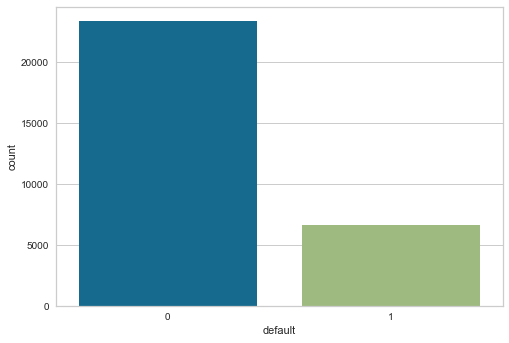

In [370]:
import seaborn as sns
sns.countplot(y)

In [371]:
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

In [536]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
X_train.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
21753,80000,2,2,2,24,0,0,0,0,0,...,78321,73731,39643,39457,3503,5001,2092,1218,1445,878
251,30000,1,2,2,28,0,0,0,0,0,...,29155,25255,22001,0,5006,1244,851,955,0,0
22941,180000,2,5,1,44,0,0,-1,-1,-1,...,850,0,6881,10340,0,850,0,6881,10340,182
618,60000,1,1,2,25,0,0,0,0,0,...,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
17090,130000,2,2,2,25,0,0,0,0,0,...,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700


In [374]:
X_train.shape

(24000, 23)

In [542]:
# Standardize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


X_test = scaler.transform(X_test)

# Logistic Regression

In [407]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(n_jobs=-1)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [408]:
from sklearn.metrics import plot_roc_curve

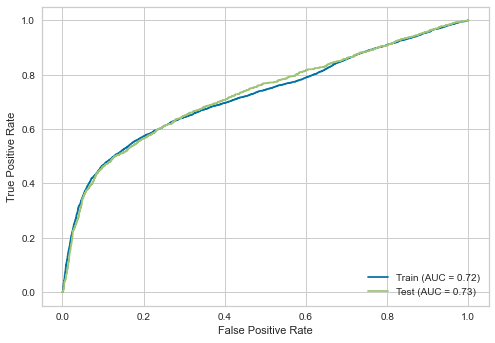

In [409]:
fig, ax = plt.subplots()

plot_roc_curve(logistic, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Test')


In [420]:
X.corr()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
limit,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
sex,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
edu,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
married,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
age,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
apr_delay,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
may_delay,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
jun_delay,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
jul_delay,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
aug_delay,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


In [418]:
pd.DataFrame(zip(logistic.coef_[0], X.columns), columns=['coef','variables']).sort_values(by='coef')

,coef,variables
11,-0.369366,apr_bill
18,-0.246551,may_pay
17,-0.175421,apr_pay
0,-0.106499,limit
3,-0.079138,married
2,-0.077640,edu
14,-0.057065,jul_bill
20,-0.056270,jul_pay
1,-0.056152,sex
22,-0.048141,sep_pay


# KNN - K Nearest Neighbors

In [386]:
from mlxtend.plotting import plot_decision_regions

In [427]:
from sklearn.datasets import make_classification

X_fake, y_fake = make_classification(n_samples=5500, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0,
                           weights=[0.8, 0.2],
                           random_state=3)

In [430]:
X_fake = pd.DataFrame(X_fake, columns=['feature_1','feature_2'])
y_fake = pd.Series(y_fake, name='target')
X_fake.head()

,feature_1,feature_2
0,-1.490236,0.854707
1,-1.886211,-0.077779
2,-1.643407,0.947921
3,-0.016212,-2.254958
4,-0.845402,-1.173690


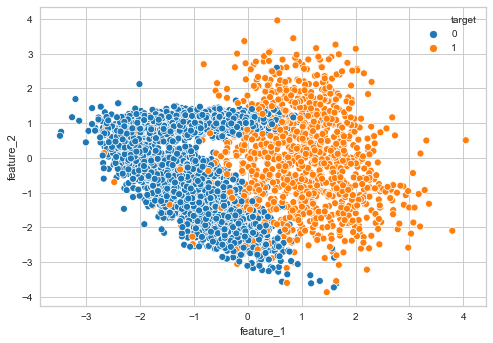

In [431]:
sns.scatterplot(X_fake.loc[:,'feature_1'], X_fake.loc[:,'feature_2'], hue=y_fake, palette='tab10')

# Splitting into train and test dataframes

In [432]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake, y_fake, test_size=0.2, random_state=42)

In [433]:
scaler_fake = StandardScaler()
scaler_fake.fit(X_fake_train)
X_fake_train_std = scaler_fake.transform(X_fake_train)

X_fake_test_std = scaler_fake.transform(X_fake_test)

## Logistic would use a straight line to separate groups

In [435]:
logistic = LogisticRegression()
logistic.fit(X_fake_train_std, y_fake_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [436]:
logistic.intercept_

array([-2.92889976])

In [437]:
logistic.coef_

array([[3.54734757, 0.32412739]])

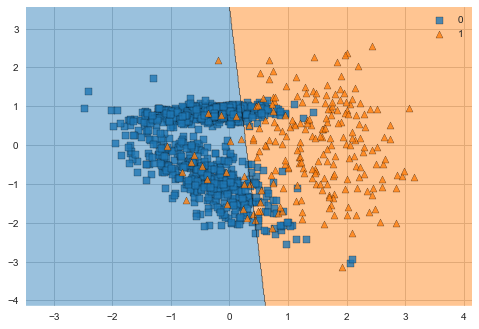

In [438]:
plot_decision_regions(np.array(X_fake_test_std), np.array(y_fake_test), log)

## KNN

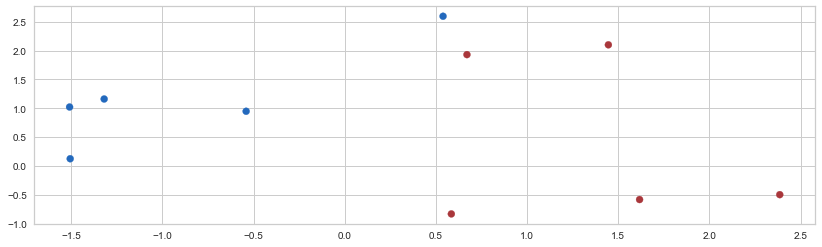

In [440]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax.scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')

Text(0.5, 1.0, 'K = 5')

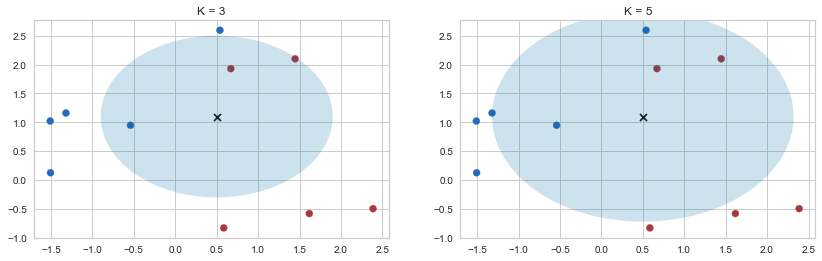

In [441]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, 2, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax[0].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (0.5, 1.1)
ax[0].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.4, alpha=.2)
ax[0].add_artist(p1)
ax[0].set_title('K = 3')

ax[1].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (0.5, 1.1)
ax[1].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.82, alpha=.2)
ax[1].add_artist(p1)
ax[1].set_title('K = 5')

Text(0.5, 1.0, 'K = 5')

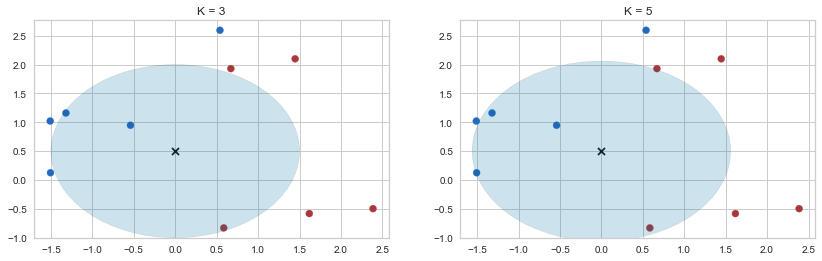

In [446]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(1, 2, figsize=(14,4))
mini_sample = X_fake_train.sample(10, random_state=4)

ax[0].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (.0, 0.5)
ax[0].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.5, alpha=.2, edgecolor='k')
ax[0].add_artist(p1)
ax[0].set_title('K = 3')


ax[1].scatter(mini_sample.iloc[:, 0], mini_sample.iloc[:, 1], c=y_fake_train.loc[mini_sample.index], cmap='vlag')
test_point = (.0, 0.5)
ax[1].scatter(test_point[0], test_point[1], marker='x', c='k')
p1 = Circle(test_point, 1.56, alpha=.2, edgecolor='k')
ax[1].add_artist(p1)
ax[1].set_title('K = 5')

In [21]:
# TODO: create interactive visualization calculating the distance to the K-nearest neighbors (using kd-tree maybe) and automatically generating the radius of the circle

## KNN Decision Boundary for different number of neighbors

In [448]:
from sklearn.neighbors import KNeighborsClassifier

In [449]:
knn = KNeighborsClassifier()

knn.fit(X_fake_train, y_fake_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

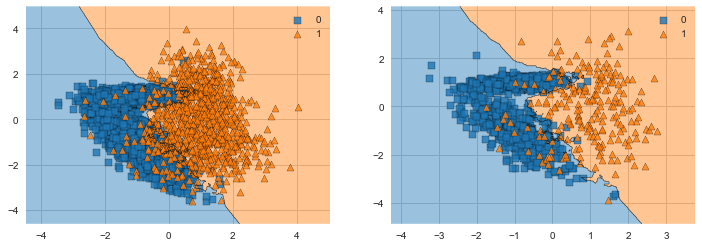

In [450]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_decision_regions(np.array(X_fake_train), np.array(y_fake_train), knn , ax= ax[0])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn , ax= ax[1])

In [451]:
import warnings
warnings.simplefilter("ignore")

Text(0.5, 1.0, 'K = 200')

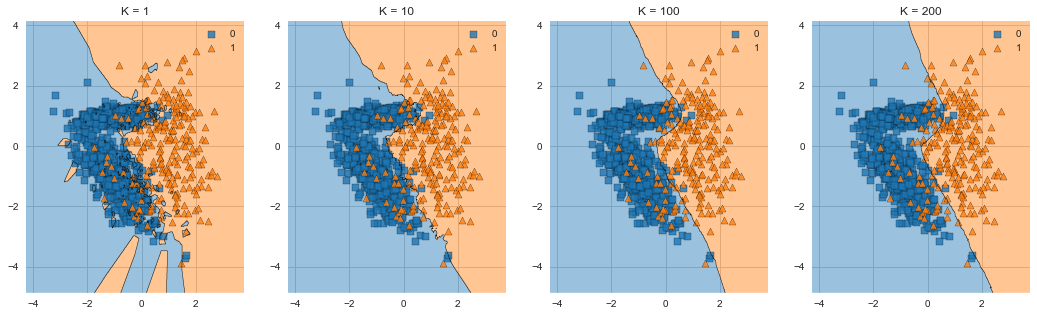

In [452]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_200 = KNeighborsClassifier(n_neighbors=200)

knn_1.fit(X_fake_train, y_fake_train)
knn_10.fit(X_fake_train, y_fake_train)
knn_100.fit(X_fake_train, y_fake_train)
knn_200.fit(X_fake_train, y_fake_train)

fig, ax = plt.subplots(1, 4, figsize=(18, 5))
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_1 , ax= ax[0])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_10 , ax= ax[1])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_100 , ax= ax[2])
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), knn_200 , ax= ax[3])

ax[0].set_title('K = 1')
ax[1].set_title('K = 10')
ax[2].set_title('K = 100')
ax[3].set_title('K = 200')

Increasing K $\to$ higher bias

Decreasing K $\to$ higher variance

In [453]:
from sklearn.metrics import roc_auc_score

In [454]:
X_fake_train.shape

(4400, 2)

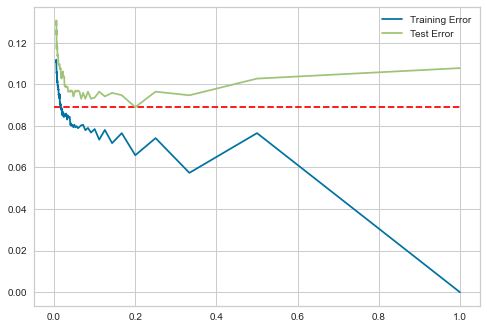

In [456]:
from tqdm.auto import tqdm

complexity = []
error_test = []
error_train = []

for K in tqdm(range(1, 200)):
    complexity.append(1/K)
    
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_fake_train, y_fake_train)
    error_train.append(1 - roc_auc_score(y_fake_train, knn.predict(X_fake_train)))
    error_test.append(1 - roc_auc_score(y_fake_test, knn.predict(X_fake_test)))
    

plt.plot(complexity, error_train, '-', label='Training Error')
plt.plot(complexity, error_test, '-', label='Test Error')
plt.hlines(min(error_test), 0, 1, colors='red', linestyles='dashed')
plt.legend()

In [471]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [458]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [463]:
pd.DataFrame(X)

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [467]:
knn.predict_proba(X_test)[:, 1]

array([0.28571429, 0.        , 0.14285714, ..., 0.14285714, 0.        ,
       0.14285714])

In [473]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

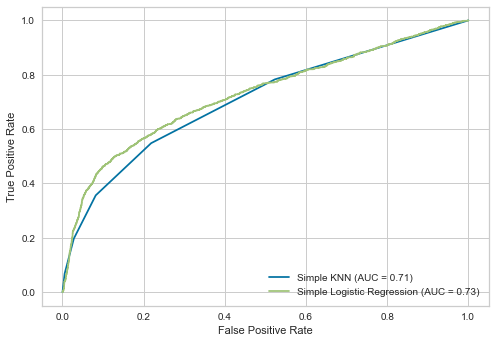

In [474]:
fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')


In [479]:
knn_fake = KNeighborsClassifier(n_neighbors=100)
knn_fake.fit(X_fake_train_std, y_fake_train)

logistic_fake = LogisticRegression()
logistic_fake.fit(X_fake_train_std, y_fake_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

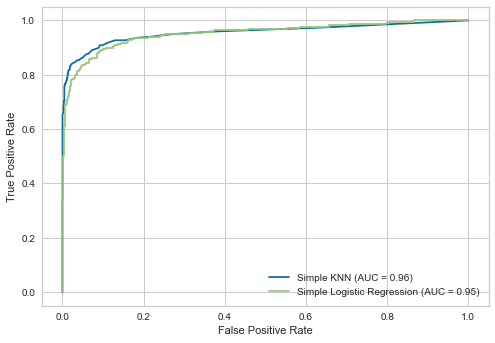

In [480]:
fig, ax = plt.subplots()

plot_roc_curve(knn_fake, X_fake_test_std, y_fake_test, ax=ax, name='Simple KNN')
plot_roc_curve(logistic_fake, X_fake_test_std, y_fake_test, ax=ax, name='Simple Logistic Regression')


## You can change the number of neighbors used

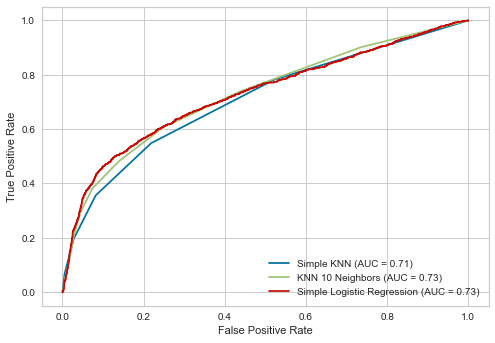

In [481]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)

knn_10.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

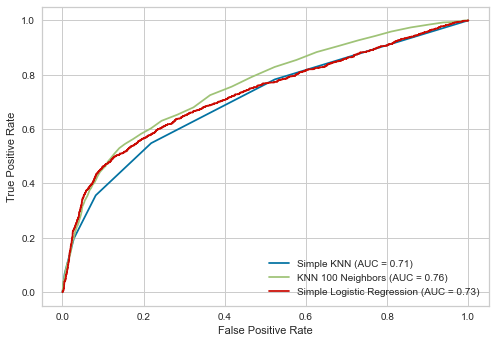

In [482]:
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train, y_train)

knn_100.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

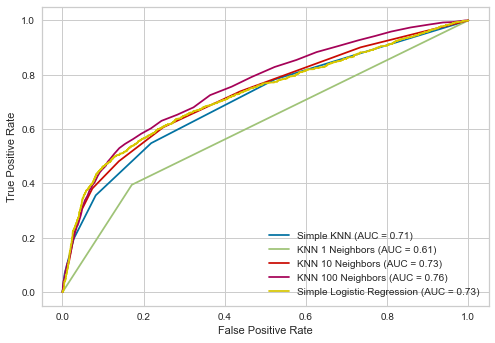

In [483]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)

knn_1.predict_proba(X_test)[:, 1]

fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_1, X_test, y_test, ax=ax, name='KNN 1 Neighbors')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

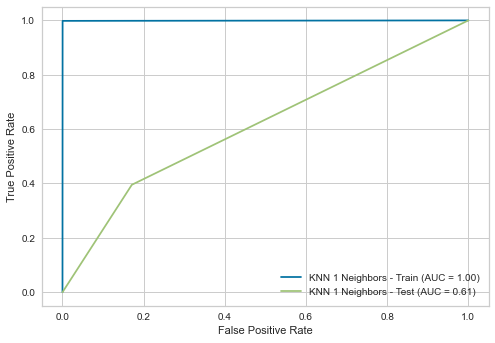

In [485]:
fig, ax = plt.subplots()

plot_roc_curve(knn_1, X_train, y_train, ax=ax, name='KNN 1 Neighbors - Train')
plot_roc_curve(knn_1, X_test, y_test, ax=ax, name='KNN 1 Neighbors - Test')

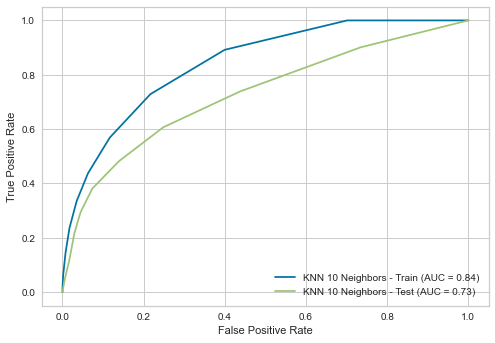

In [486]:
fig, ax = plt.subplots()

plot_roc_curve(knn_10, X_train, y_train, ax=ax, name='KNN 10 Neighbors - Train')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors - Test')

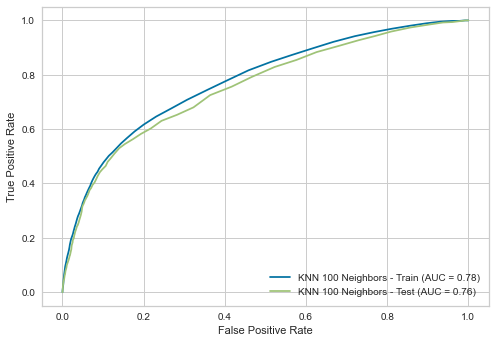

In [487]:
fig, ax = plt.subplots()

plot_roc_curve(knn_100, X_train, y_train, ax=ax, name='KNN 100 Neighbors - Train')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors - Test')

## You can weight observations by the inverse of the distance

In [490]:
knn_dist = KNeighborsClassifier(n_neighbors=100, weights='distance')
knn_dist.fit(X_train, y_train)

knn_dist.predict_proba(X_test)[:, 1]

array([0.23788364, 0.0266836 , 0.09704301, ..., 0.17038641, 0.13642223,
       0.09987845])

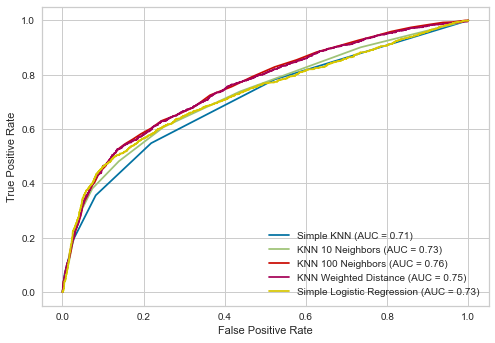

In [491]:
fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')


## You can specify different metrics

In [493]:
X_train.shape

(24000, 23)

In [494]:
# p=1 MANHATTAN, or CITYBLOCK
# p=1 EUCLIDEAN DISTANCE

knn_manhattan = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1, n_jobs=-1) 
knn_manhattan.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=1,
                     weights='distance')

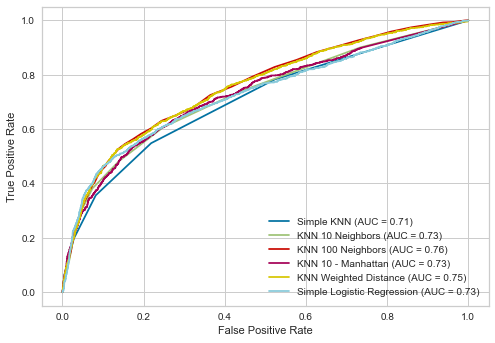

In [495]:
fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(knn_manhattan, X_test, y_test, ax=ax, name='KNN 10 - Manhattan')
plot_roc_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')

## Input Missing values

In [496]:
from sklearn.impute import KNNImputer

In [543]:
test = X_train.copy()
XX = pd.DataFrame(test, columns=X.columns)

XX

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,-0.672359,0.808159,0.184306,0.858114,-1.244658,0.014796,0.109694,0.141120,0.188700,0.234055,...,0.455707,0.479450,-0.008367,0.011698,-0.126892,-0.039537,-0.173567,-0.224654,-0.216008,-0.245240
1,-1.057768,-1.237381,0.184306,0.858114,-0.811521,0.014796,0.109694,0.141120,0.188700,0.234055,...,-0.254132,-0.277182,-0.299323,-0.653898,-0.038915,-0.194250,-0.241596,-0.240785,-0.308523,-0.295532
2,0.098459,0.808159,3.971420,-1.054828,0.921024,0.014796,0.109694,-0.698046,-0.667404,-0.648616,...,-0.662788,-0.671371,-0.548685,-0.479473,-0.331937,-0.210475,-0.288246,0.122676,0.353487,-0.285107
3,-0.826523,-1.237381,-1.078065,0.858114,-1.136374,0.014796,0.109694,0.141120,0.188700,0.234055,...,-0.118736,-0.052671,-0.008763,0.006350,-0.213815,-0.167236,-0.178610,-0.207358,-0.186877,-0.180973
4,-0.286950,0.808159,0.184306,0.858114,-1.136374,0.014796,0.109694,0.141120,0.188700,0.234055,...,0.981423,1.167654,1.330983,1.436224,-0.091947,-0.072522,-0.014157,0.007308,0.011598,0.317359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,-0.903605,-1.237381,0.184306,0.858114,-0.378385,0.014796,0.109694,0.141120,0.188700,0.234055,...,0.129677,0.202027,-0.179969,-0.550677,-0.214869,-0.121938,-0.201031,-0.294942,-0.235919,3.909990
23996,0.252623,-1.237381,-1.078065,0.858114,0.163035,1.790286,1.779631,1.819451,1.900908,1.999396,...,1.756029,1.891243,2.125496,2.248967,0.458274,0.001602,-0.288246,0.160641,0.075622,-0.066413
23997,-0.903605,-1.237381,-1.078065,0.858114,-1.028090,-1.760694,-1.560243,-1.537212,-1.523508,-1.531286,...,-0.675060,-0.671371,-0.662168,-0.653898,-0.331937,-0.245478,-0.288246,-0.299358,-0.308523,-0.295532
23998,-0.749441,0.808159,0.184306,0.858114,-1.136374,0.014796,0.109694,0.141120,0.188700,1.999396,...,0.063452,-0.123174,-0.189946,-0.180911,-0.156335,-0.163118,-0.041565,-0.225758,-0.308523,-0.226796


In [551]:
X

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,...,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [544]:
XX.loc[2, 'limit'] = np.nan

In [545]:
XX.loc[4, 'age'] = np.nan

In [546]:
XX.loc[0, 'sex'] = np.nan

In [558]:
X_numerical = X.drop(columns=['sex','edu','married','apr_delay','may_delay','jun_delay','jul_delay','aug_delay','sep_delay'])

In [561]:
scaler_num = StandardScaler()
scaler_num.fit(X_numerical)

X_numerical = pd.DataFrame(scaler_num.transform(X_numerical), columns=X_numerical.columns)

In [563]:
X_numerical.head()

,limit,age,apr_bill,may_bill,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [569]:
X_numerical.loc[2, 'limit'] = np.nan

X_numerical.loc[4, 'apr_bill'] = np.nan

In [570]:
X_numerical.head()

,limit,age,apr_bill,may_bill,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,NaN,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,NaN,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [571]:
imputer = KNNImputer(n_neighbors=200)
imputer.fit(X_numerical)
pd.DataFrame(imputer.transform(X_numerical))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.591422,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.366170,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [587]:
pd.DataFrame(X, columns=X.columns).apr_delay.describe()

count    30000.000000
mean        -0.016700
std          1.123802
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: apr_delay, dtype: float64

In [576]:
X_new_train = pd.DataFrame(X_train, columns=X.columns).drop(columns=['sex','edu','married','apr_delay','may_delay','jun_delay','jul_delay','aug_delay','sep_delay'])
X_new_test = pd.DataFrame(X_test, columns=X.columns).drop(columns=['sex','edu','married','apr_delay','may_delay','jun_delay','jul_delay','aug_delay','sep_delay'])

In [581]:
knn_num = KNeighborsClassifier(n_neighbors=100)
knn_num.fit(X_new_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

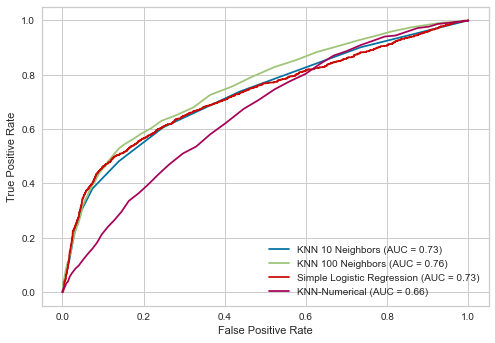

In [582]:
fig, ax = plt.subplots()

plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')
plot_roc_curve(knn_num, X_new_test, y_test, ax=ax, name='KNN-Numerical')


In [618]:
pd.concat([X, y], axis=1).groupby('apr_delay').default.mean()

apr_delay
-2    0.132294
-1    0.167781
 0    0.128113
 1    0.339479
 2    0.691414
 3    0.757764
 4    0.684211
 5    0.500000
 6    0.545455
 7    0.777778
 8    0.578947
Name: default, dtype: float64

In [616]:
X.apr_delay

0        2
1       -1
2        0
3        0
4       -1
        ..
29995    0
29996   -1
29997    4
29998    1
29999    0
Name: apr_delay, Length: 30000, dtype: int64

In [ ]:
# gower distance

# Decision Trees

In [588]:
from sklearn.tree import DecisionTreeClassifier

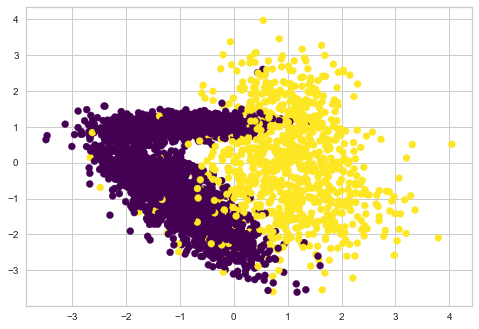

In [632]:
plt.scatter(X_fake_train.feature_1, X_fake_train.feature_2, c=y_fake_train, cmap='viridis')

In [627]:
tree = DecisionTreeClassifier()
tree.fit(X_fake_train, y_fake_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

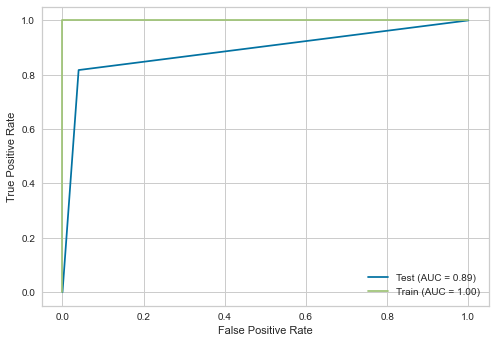

In [626]:
fig, ax= plt.subplots()
plot_roc_curve(tree, X_fake_test, y_fake_test, name='Test', ax=ax)
plot_roc_curve(tree, X_fake_train, y_fake_train, name='Train', ax=ax)

In [628]:
from sklearn.tree import plot_tree

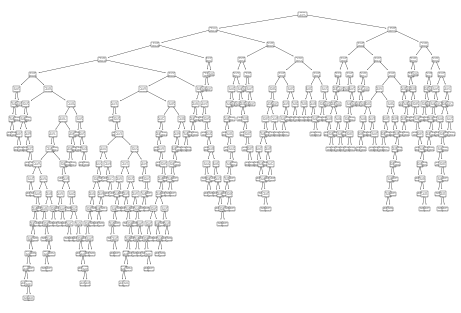

In [629]:
plot_tree(tree);

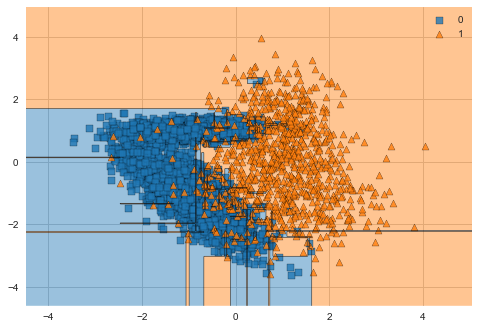

In [631]:
plot_decision_regions(np.array(X_fake_train), np.array(y_fake_train), tree)

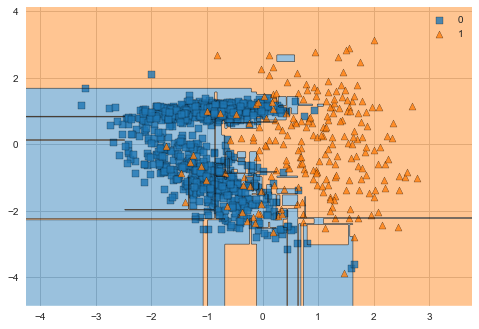

In [630]:
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree)

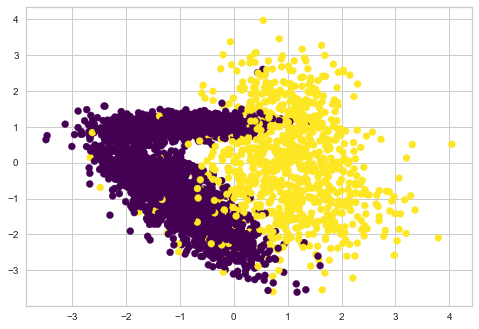

In [633]:

plt.scatter(X_fake_train.feature_1, X_fake_train.feature_2, c=y_fake_train, cmap='viridis')

## Some theory

## Gini Index

$$ G = \sum_{k=0}^{1} \hat{p}_{mk} \left(1  - \hat{p}_{mk} \right) \to \text{node purity}$$

$\hat{p}_{mk}$ is the proportion of training observations that falls into the $m$-th leaf, from the $k$-th class.

For example, if the proportion of observations is random, that is, there are ~50% observations from y=1, and ~50% observations from y=0, the Gini Index would be: 
$$ G = 0.5 \cdot (1-0.5) = 0.25 $$

If, on the other hand, when you see a leaf of the tree, you get 90% from target=1 and 10% from target=0, you would have:

$$ G = 0.9 \cdot (1 - 0.9) = 0.09 $$

Text(0, 0.5, 'Gini Index')

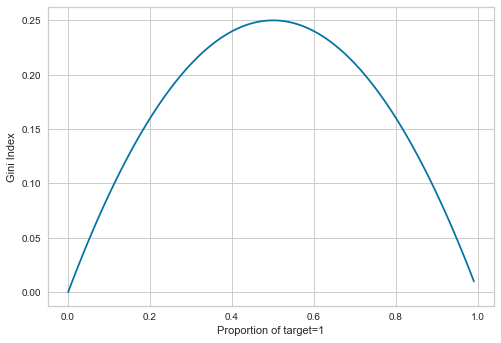

In [61]:
plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01) * (1 - np.arange(0, 1, 0.01)))
plt.xlabel('Proportion of target=1')
plt.ylabel('Gini Index')

## Entropy 

$$ D = - \sum_{k=1}^2\hat{p}_{mk}log\left( \hat{p}_{mk} \right) $$

Text(0, 0.5, 'Gini Index')

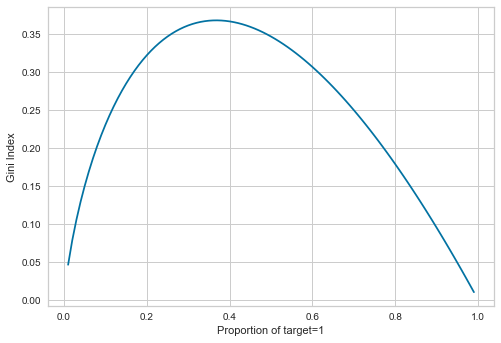

In [62]:
plt.plot(np.arange(0, 1, 0.01), - np.arange(0, 1, 0.01) * np.log(np.arange(0, 1, 0.01)))
plt.xlabel('Proportion of target=1')
plt.ylabel('Gini Index')

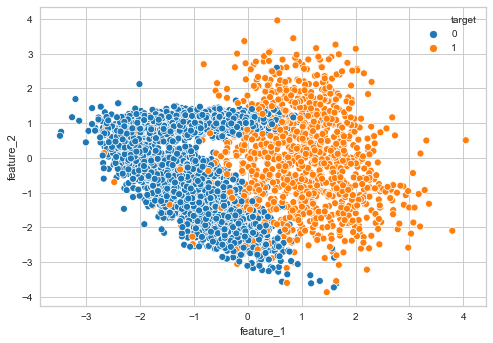

In [63]:
sns.scatterplot(X_fake.loc[:,'feature_1'], X_fake.loc[:,'feature_2'], hue=y_fake, palette='tab10')

In [634]:
tree = DecisionTreeClassifier()
tree.fit(X_fake_train, y_fake_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

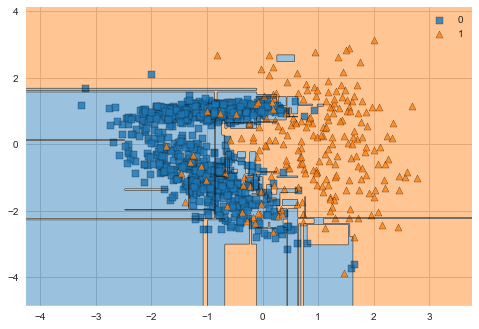

In [635]:
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree)

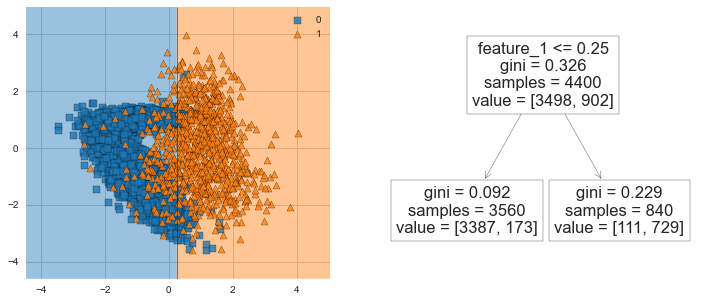

In [646]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_fake_train, y_fake_train)
plot_decision_regions(np.array(X_fake_train), np.array(y_fake_train), tree, ax=ax[0])
plot_tree(tree, ax=ax[1], feature_names=X_fake.columns,  );

In [643]:
729/840

0.8678571428571429

In [644]:
173/3560

0.04859550561797753

In [649]:
X_fake_train

,feature_1,feature_2
4315,2.434897,-1.753752
1832,-2.039200,0.736151
3819,-1.720234,0.067654
957,-1.260037,-0.445162
3545,-2.063751,0.734676
...,...,...
3772,-1.047143,1.060261
5191,-0.444509,-1.212619
5226,-1.187000,-0.584520
5390,-1.391984,0.479200


In [650]:
tree.predict_proba(X_fake_train)[:, 1][:5]

array([0.86785714, 0.04859551, 0.04859551, 0.04859551, 0.04859551])

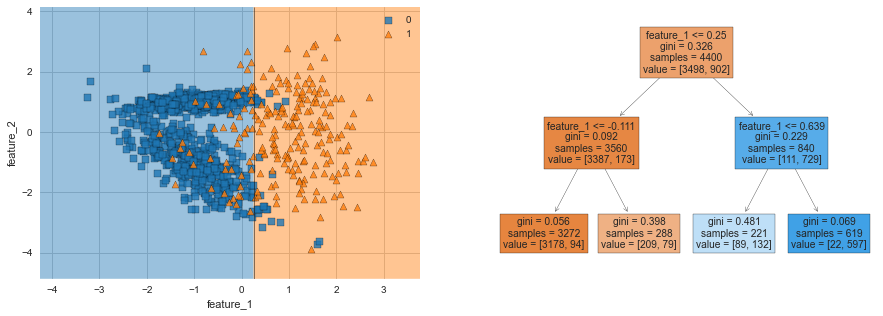

In [652]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_fake_train, y_fake_train)

plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree, ax=ax[0])
ax[0].set_xlabel('feature_1')
ax[0].set_ylabel('feature_2')

plot_tree(tree, ax=ax[1], feature_names=X_fake_test.columns, filled=True);

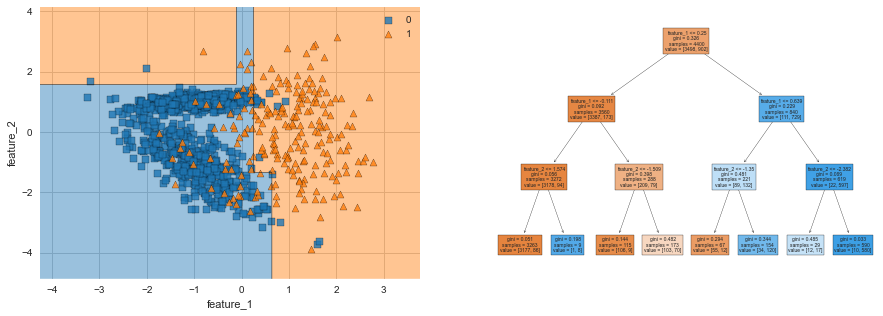

In [653]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_fake_train, y_fake_train)
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree, ax=ax[0])
ax[0].set_xlabel('feature_1')
ax[0].set_ylabel('feature_2')

plot_tree(tree, ax=ax[1], feature_names=X_fake_test.columns, filled=True);

In [654]:
58/59

0.9830508474576272

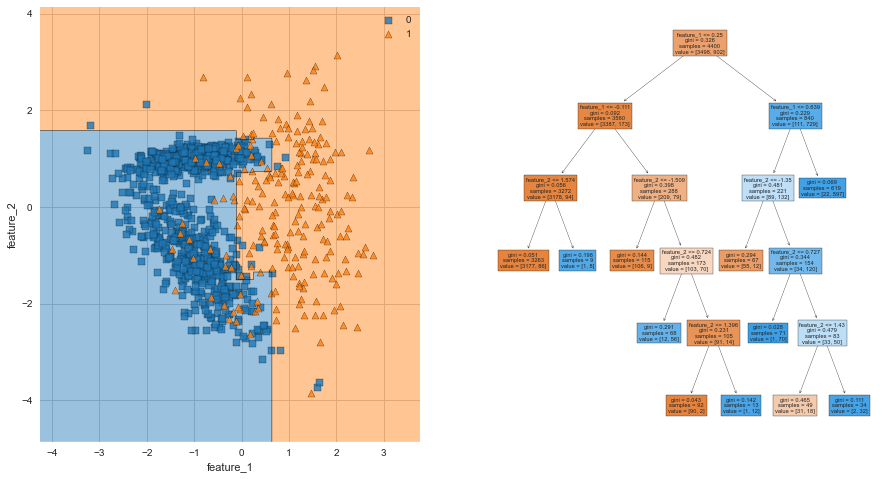

In [657]:
# Regularization Intro:

fig, ax = plt.subplots(1, 2, figsize=(15,8))

tree = DecisionTreeClassifier(ccp_alpha=0.002)
tree.fit(X_fake_train, y_fake_train)
plot_decision_regions(np.array(X_fake_test), np.array(y_fake_test), tree, ax=ax[0])
ax[0].set_xlabel('feature_1')
ax[0].set_ylabel('feature_2')

plot_tree(tree, ax=ax[1], feature_names=X_fake_test.columns, filled=True);

In [658]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [659]:
tree_ccp = DecisionTreeClassifier(ccp_alpha=0.002)
tree_ccp.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

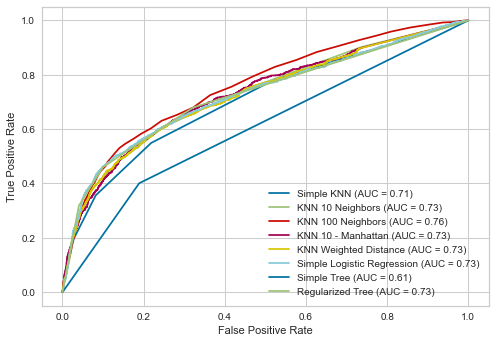

In [186]:
fig, ax = plt.subplots()

plot_roc_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_roc_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_roc_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_roc_curve(knn_manhattan, X_test, y_test, ax=ax, name='KNN 10 - Manhattan')
plot_roc_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_roc_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')
plot_roc_curve(tree, X_test, y_test, ax=ax, name='Simple Tree')
plot_roc_curve(tree_ccp, X_test, y_test, ax=ax, name='Regularized Tree')



In [660]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
DecisionTreeClassifier()

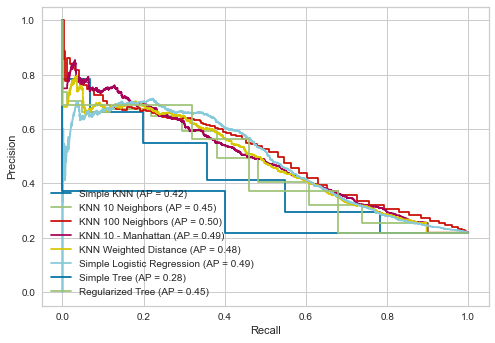

In [188]:
fig, ax = plt.subplots()

plot_precision_recall_curve(knn, X_test, y_test, ax=ax, name='Simple KNN')
plot_precision_recall_curve(knn_10, X_test, y_test, ax=ax, name='KNN 10 Neighbors')
plot_precision_recall_curve(knn_100, X_test, y_test, ax=ax, name='KNN 100 Neighbors')
plot_precision_recall_curve(knn_manhattan, X_test, y_test, ax=ax, name='KNN 10 - Manhattan')
plot_precision_recall_curve(knn_dist, X_test, y_test, ax=ax, name='KNN Weighted Distance')
plot_precision_recall_curve(logistic, X_test, y_test, ax=ax, name='Simple Logistic Regression')
plot_precision_recall_curve(tree, X_test, y_test, ax=ax, name='Simple Tree')
plot_precision_recall_curve(tree_ccp, X_test, y_test, ax=ax, name='Regularized Tree')



# Feature Importance in Decision Trees

In [672]:
tree_ccp.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.79155192, 0.15813141, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05031666,
       0.        , 0.        , 0.        ])

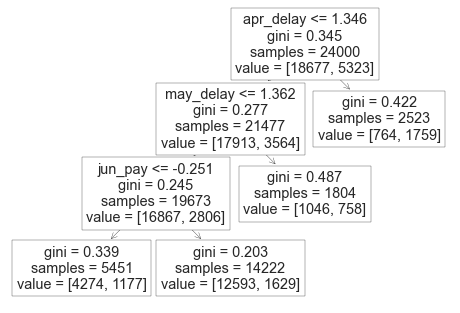

In [678]:
plot_tree(tree_ccp, feature_names=X.columns);

In [682]:
tree_ccp.predict_proba(X_train)

array([[0.88545915, 0.11454085],
       [0.88545915, 0.11454085],
       [0.78407632, 0.21592368],
       ...,
       [0.78407632, 0.21592368],
       [0.88545915, 0.11454085],
       [0.88545915, 0.11454085]])

In [681]:
pd.DataFrame(zip(X.columns, tree_ccp.feature_importances_))

,0,1
0,limit,0.000000
1,sex,0.000000
2,edu,0.000000
3,married,0.000000
4,age,0.000000
5,apr_delay,0.791552
6,may_delay,0.158131
7,jun_delay,0.000000
8,jul_delay,0.000000
9,aug_delay,0.000000


## Standardization?

Useless

## Outlier?

Small Effect